## Install modules to environment

In [1]:
%pip install pandas numpy requests seaborn matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Import modules

In [2]:
from Backtesting.dataFetchers.marketDataFetchers import CoinbaseFetcher
from Backtesting.dataFetchers.onChainMetricsFetchers import CryptoQuantFetcher
from Backtesting.dataFetchers.onChainMetricsFetchers import CryptoQuantFetcherWithoutExchange
from Backtesting.strategies.flowSignalStrategy import FlowSignalStrategy

from Backtesting.backtest import Backtest

from datetime import datetime



## Fetch Data

Input API key and desired interval and window

In [3]:
API_KEY = "GlYxSZP9hnooNl6gGAjtkptkeqehSnk5C60Akhpw5zupBK6O"


### Market Data

In [4]:
MARKET_DATA_BASE_URL = "https://api.datasource.cybotrade.rs/coinbase/candle"


In [ ]:
# start_time = int(datetime(2023, 1, 1).timestamp() * 1000)
# end_time = int(datetime(2024, 12, 31, 23, 59).timestamp() * 1000)

bt_start_time = int(datetime(2020, 1, 1).timestamp() * 1000)
bt_end_time = int(datetime(2023, 12, 31, 23, 59).timestamp() * 1000)

ft_start_time = int(datetime(2024, 1, 1).timestamp() * 1000)
ft_end_time = int(datetime(2025, 4, 1, 23, 59).timestamp() * 1000)

# bt_start_time = int(datetime(2023, 1, 1).timestamp() * 1000)
# bt_end_time = int(datetime(2023, 2, 1, 23, 59).timestamp() * 1000)

# ft_start_time = int(datetime(2024, 1, 1).timestamp() * 1000)
# ft_end_time = int(datetime(2024, 2, 1, 23, 59).timestamp() * 1000)


### On Chain Metrics Data 

In [6]:
ONCHAIN_API_KEY = "GlYxSZP9hnooNl6gGAjtkptkeqehSnk5C60Akhpw5zupBK6O"
ONCHAIN_DATA_BASE_URL = "https://api.datasource.cybotrade.rs/cryptoquant"
GLASSNODE_BASE_URL = "https://api.datasource.cybotrade.rs/glassnode"
EXCHANGE = "binance" # Can be any exchange available on CryptoQuant
CURRENCY = "btc" # Can be any symbol available on CryptoQuant
ASSET = "BTC"
ON_CHAIN_LIMIT = None # Number of data points to fetch

ohlcv_window = "day"
ohlcv_endpoint_category = "market-data"
ohlcv_metric = "price-ohlcv"

netflow_window = "day"
netflow_endpoint_category = "exchange-flows"
netflow_metric = "netflow"

exchange_whale_ratio_window = "day"
exchange_whale_ratio_endpoint_category = "flow-indicator"
exchange_whale_ratio_metric = "exchange-whale-ratio"

funding_rates_window = "day"
funding_rates_endpoint_category = "market-data"
funding_rates_metric = "funding-rates"

dormancy_window = "day"
dormancy_endpoint_category = "network-indicator"
dormancy_metric = "dormancy"



In [7]:
def fetch_on_chain_datas(start_time, end_time, file_name):

    on_chain_fetcher_ohlcv = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, ohlcv_endpoint_category, ohlcv_metric, EXCHANGE, ON_CHAIN_LIMIT)
    on_chain_fetcher_ohlcv.fetch_ohlcv(ohlcv_window, start_time, end_time)

    on_chain_fetcher_netflow = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, netflow_endpoint_category, netflow_metric, EXCHANGE, ON_CHAIN_LIMIT)
    on_chain_fetcher_netflow.fetch_netflow(netflow_window, start_time, end_time)

    on_chain_fetecher_exchange_whale_ratio = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, exchange_whale_ratio_endpoint_category, exchange_whale_ratio_metric, EXCHANGE, ON_CHAIN_LIMIT)
    on_chain_fetecher_exchange_whale_ratio.fetch_exchange_whale_ratio(exchange_whale_ratio_window, start_time, end_time)

    on_chain_fetcher_funding_rates = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, funding_rates_endpoint_category, funding_rates_metric, EXCHANGE, ON_CHAIN_LIMIT)
    on_chain_fetcher_funding_rates.fetch_funding_rates(funding_rates_window, start_time, end_time)

    on_chain_fetcher_without_exchange_dormancy = CryptoQuantFetcherWithoutExchange(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, dormancy_endpoint_category, dormancy_metric, ON_CHAIN_LIMIT)
    on_chain_fetcher_without_exchange_dormancy.fetch_dormancy(dormancy_window, start_time, end_time)

    print("📁 Ohlcv path:", on_chain_fetcher_ohlcv.saved_filepath)
    print("📁 Netflow path:", on_chain_fetcher_netflow.saved_filepath)
    print("📁 Whale Ratio path:", on_chain_fetecher_exchange_whale_ratio.saved_filepath)
    print("📁 Funding Rates path:", on_chain_fetcher_funding_rates.saved_filepath)
    print("📁 Dormancy path:", on_chain_fetcher_without_exchange_dormancy.saved_filepath)

    csvs_to_merge = [
    on_chain_fetcher_ohlcv.saved_filepath,
    on_chain_fetcher_netflow.saved_filepath,
    on_chain_fetecher_exchange_whale_ratio.saved_filepath,
    on_chain_fetcher_funding_rates.saved_filepath,
    on_chain_fetcher_without_exchange_dormancy.saved_filepath
    ]

    CryptoQuantFetcher.merge_selected_csv_files(csvs_to_merge, file_name) 




### Fetch hmm model data

In [8]:
backtest_dataset_file_path = "datasets/backtest_data.csv"
forwardtest_dataset_file_path = "datasets/forwardtest_data.csv"

fetch_on_chain_datas(bt_start_time, bt_end_time, backtest_dataset_file_path)
fetch_on_chain_datas(ft_start_time, ft_end_time, forwardtest_dataset_file_path)

Fetching market-data/price-ohlcv data for btc from binance with window 'day'...
Using range: 2020-09-30 16:00:00 to 2023-12-31 15:59:00
✅ Retrieved 1187 records. Total so far: 1187
Using range: 2023-12-31 00:00:01 to 2023-12-31 15:59:00
❌ Error 400: {"error":"'limit' must be between [1, 100000]"}
💾 Saved to datasets/binance_price-ohlcv_day_Training data_1703980801000_to_1704038340000.csv with 1187 rows.
                open      high       low     close       volume
timestamp                                                      
2023-12-27  42508.93  43677.00  42098.69  43428.85  36191.21136
2023-12-28  43428.86  43787.57  42241.79  42563.76  35150.52485
2023-12-29  42563.76  43111.00  41300.00  42066.95  42597.18912
2023-12-30  42066.94  42612.32  41520.30  42140.28  22906.57818
2023-12-31  42140.29  42899.00  41965.84  42283.58  23585.91603
Fetching exchange-flows/netflow data for btc from binance with window 'day'...
Using range: 2020-09-30 16:00:00 to 2023-12-31 15:59:00
✅ Retrieve

## Instantiate Strategy

      timestamp      open      high       low     close        volume  \
1    2020-10-02  10619.13  10664.64  10374.00  10570.40  50130.393705   
2    2020-10-03  10570.40  10603.56  10496.46  10542.06  22298.221341   
3    2020-10-04  10542.07  10696.87  10517.87  10666.63  23212.001595   
4    2020-10-05  10666.62  10798.00  10615.64  10792.21  34025.761653   
5    2020-10-06  10792.20  10800.00  10525.00  10599.66  48674.740471   
...         ...       ...       ...       ...       ...           ...   
1182 2023-12-27  42508.93  43677.00  42098.69  43428.85  36191.211360   
1183 2023-12-28  43428.86  43787.57  42241.79  42563.76  35150.524850   
1184 2023-12-29  42563.76  43111.00  41300.00  42066.95  42597.189120   
1185 2023-12-30  42066.94  42612.32  41520.30  42140.28  22906.578180   
1186 2023-12-31  42140.29  42899.00  41965.84  42283.58  23585.916030   

      netflow_total  exchange_whale_ratio  funding_rates  average_dormancy  \
1       9709.219131              0.262647    

         1   -8572.04051326             +nan
         2   -7963.00381565    +609.03669761
         3   -7778.08854453    +184.91527111
         4   -7711.03382501     +67.05471952
         5   -7690.42935047     +20.60447454
         6   -7684.03226958      +6.39708090
         7   -7681.25442035      +2.77784923
         8   -7679.56085572      +1.69356463
         9   -7678.19522794      +1.36562779
        10   -7676.89910104      +1.29612690
        11   -7675.57287796      +1.32622308
        12   -7674.01167612      +1.56120184
        13   -7671.43608585      +2.57559027
        14   -7669.02936989      +2.40671595
        15   -7667.67682275      +1.35254714
        16   -7666.60205112      +1.07477163
        17   -7665.66447501      +0.93757611
        18   -7664.84766200      +0.81681302
        19   -7664.13355245      +0.71410954
        20   -7663.50034817      +0.63320428
        21   -7662.92667646      +0.57367171
        22   -7662.39371421      +0.53296224
        23

Unique states: [2 0 1]
[2 0 1]


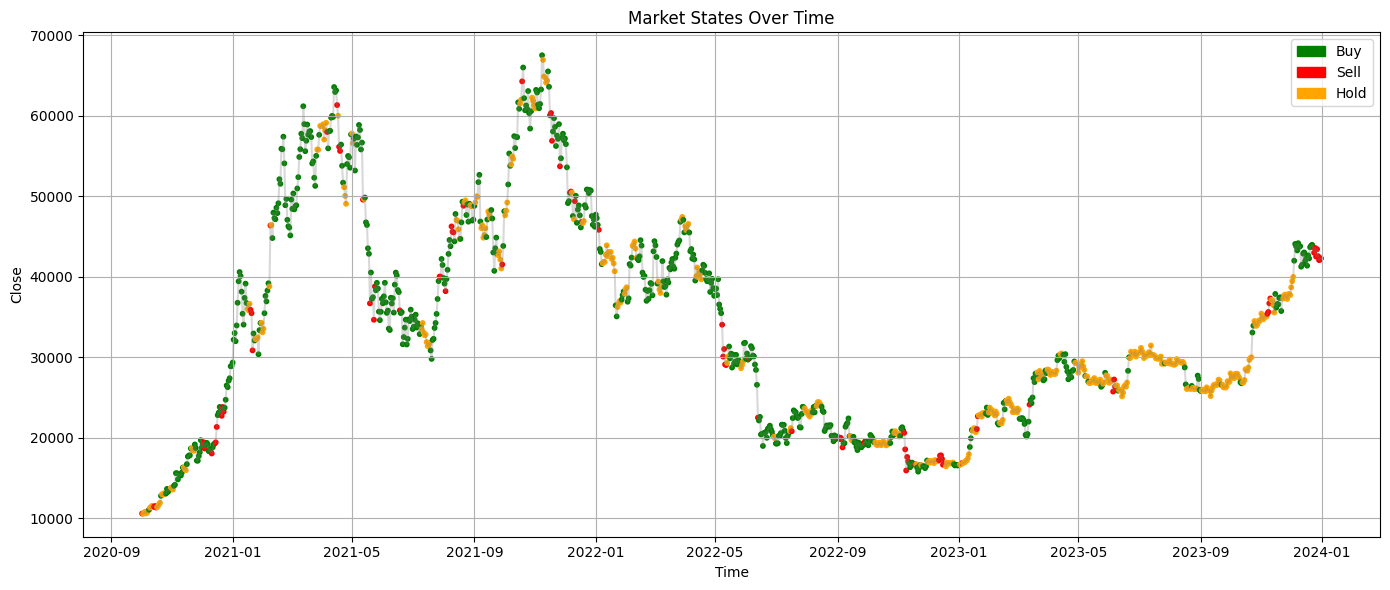

Converged: True
Final log likelihood: -7551.706238821037
State Labels: {1: 'buy', 2: 'sell', 0: 'hold'}
      timestamp      open     close  netflow_total  exchange_whale_ratio  \
1    2020-10-02  10619.13  10570.40    9709.219131              0.262647   
2    2020-10-03  10570.40  10542.06     497.942106              0.170109   
3    2020-10-04  10542.07  10666.63   -1340.747451              0.144183   
4    2020-10-05  10666.62  10792.21   -2116.200486              0.275049   
5    2020-10-06  10792.20  10599.66    1048.674422              0.167017   
...         ...       ...       ...            ...                   ...   
1182 2023-12-27  42508.93  43428.85   -4560.323842              0.461077   
1183 2023-12-28  43428.86  42563.76   -4583.994366              0.330835   
1184 2023-12-29  42563.76  42066.95   -5925.682344              0.345703   
1185 2023-12-30  42066.94  42140.28   15040.904774              0.147352   
1186 2023-12-31  42140.29  42283.58    7465.803908          

/Users/winnee/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0346
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0031
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0024
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0022
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0020
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0018
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0017
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0015
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0014
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0014


In [9]:
mfs = FlowSignalStrategy(backtest_dataset_file_path, backtest_dataset_file_path)

In [10]:
bt = Backtest(mfs, 10, 0.006)

Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1127, 60, 5), y=(1127, 1)
🕒 Predicting for 1127 hours ≈ 47.0 days
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-11-30      19695.87     18352.033980
61   2020-12-01      18764.96     18362.014587
62   2020-12-02      19204.09     18504.146114
63   2020-12-03      19421.90     18587.300861
64   2020-12-04      18650.52     18693.198555
...         ...           ...              ...
1182 2023-12-27      43428.85     44196.237196
1183 2023-12-28      42563.76     44215.583645
1184 2023-12-29      42066.95     44235.215400
1185 2023-12-30      42140.28     44319.339847
1186 2023-12-31      42283.58     44158.237184

[1127 rows x 3 columns]


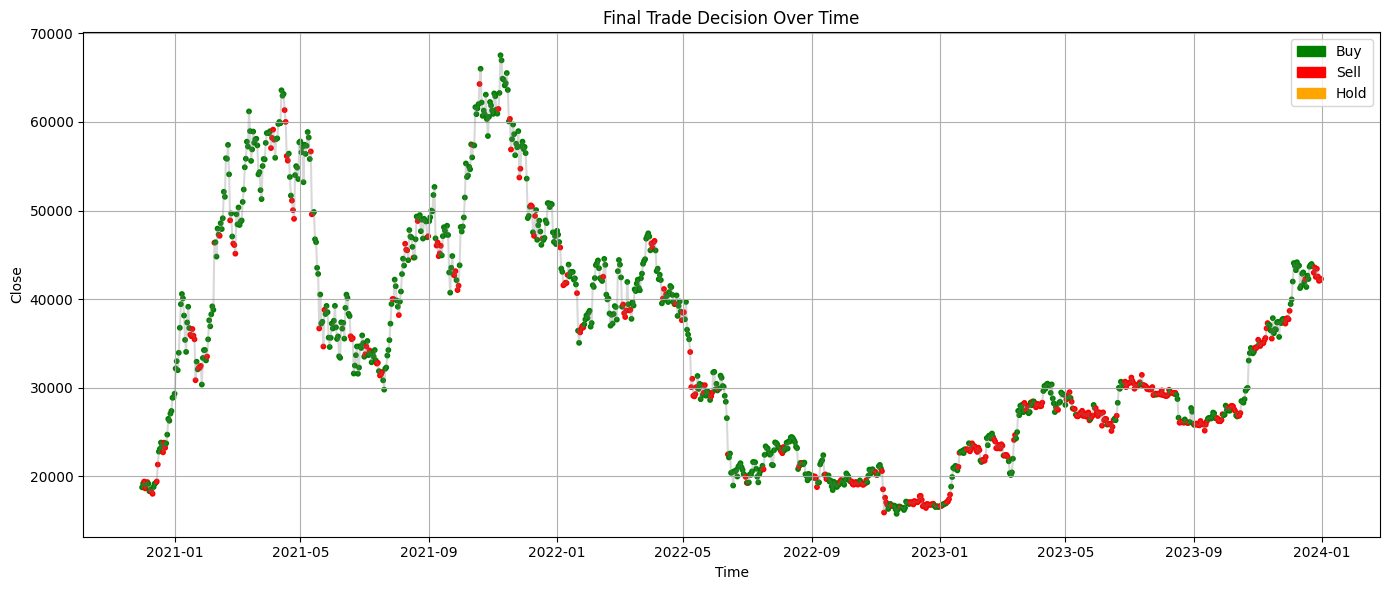

In [11]:
bt.run()

In [12]:
performance = bt.get_performance_results()

for key, value in performance.items():
    print(f"{key}: {value}")

Start Trade Date: 2020-12-01 00:00:00
End Trade Date: 2023-12-31 00:00:00
Number of Trades: 463
Sharpe Ratio: -1.230201
Max Drawdown (%): -3.224488
Trade per Interval: 0.41119
Trading Fees: 0.006


In [13]:
bt.get_trade_logs_csv()

Trade logs saved to backtest_trade_logs.csv


bullish range:  [0.2 0.4 0.6 0.8]
bearish range:  [0.2 0.4 0.6 0.8]
Running with bullish=0.20, bearish=0.20
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1127, 60, 5), y=(1127, 1)
🕒 Predicting for 1127 hours ≈ 47.0 days
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-11-30      19695.87     18352.033980
61   2020-12-01      18764.96     18362.014587
62   2020-12-02      19204.09     18504.146114
63   2020-12-03      19421.90     18587.300861
64   2020-12-04      18650.52     18693.198555
...         ...           ...              ...
1182 2023-12-27      43428.85     44196.237196
1183 2023-12-28      42563.76     44215.583645
1184 2023-12-29      42066.95     44235.215400
1185 2023-12-30      42140.28     44319.339847
1186 2023-12-31      42283.58     44158.237184

[1127 rows x 3 columns]

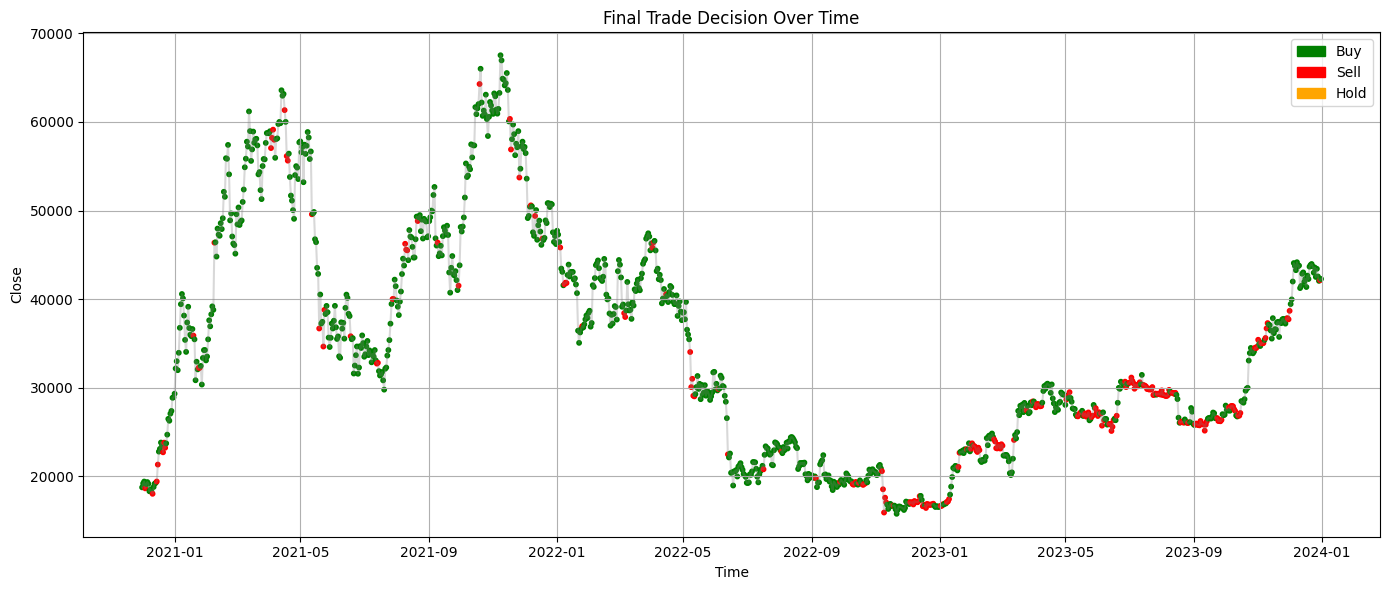

{'Start Trade Date': Timestamp('2020-12-01 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 341, 'Sharpe Ratio': np.float64(-0.865127), 'Max Drawdown (%)': np.float64(-2.457383), 'Trade per Interval': np.float64(0.302842), 'Trading Fees': 0.006}
Result for bullish=0.20, bearish=0.20: -0.865127
Running with bullish=0.20, bearish=0.40
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1127, 60, 5), y=(1127, 1)
🕒 Predicting for 1127 hours ≈ 47.0 days
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-11-30      19695.87     18352.033980
61   2020-12-01      18764.96     18362.014587
62   2020-12-02      19204.09     18504.146114
63   2020-12-03      19421.90     18587.300861
64   2020-12-04      18650.52     18693.198555
...         ...           ...              .

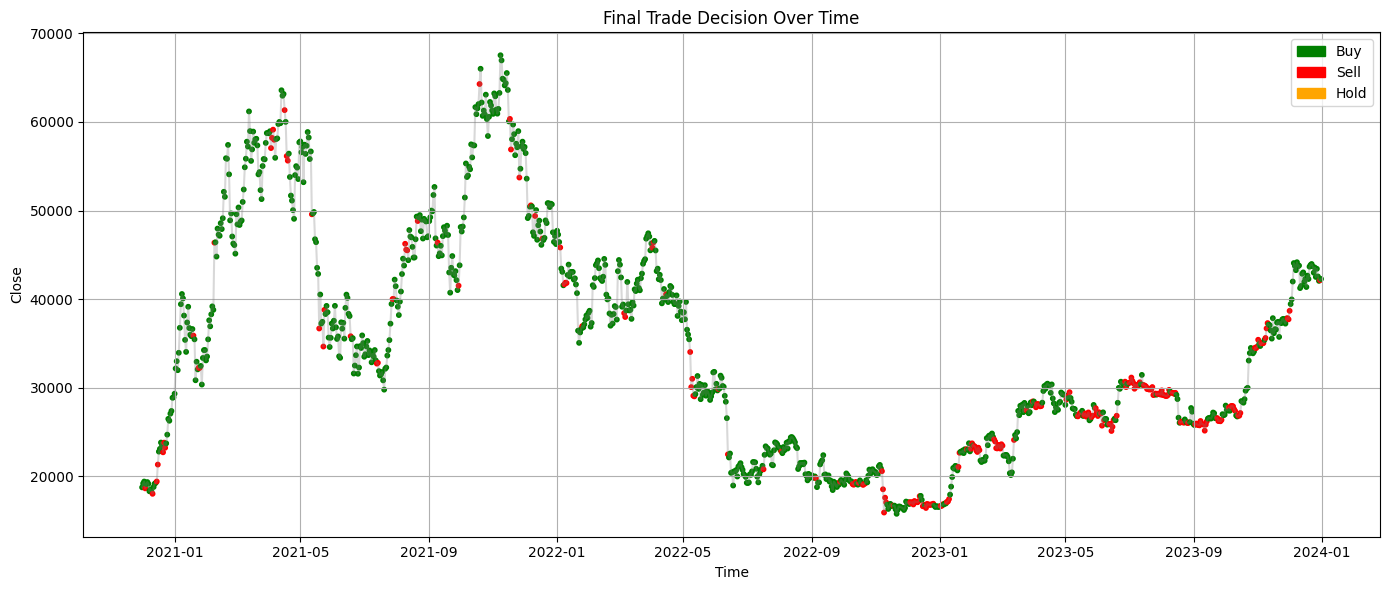

{'Start Trade Date': Timestamp('2020-12-01 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 341, 'Sharpe Ratio': np.float64(-0.865127), 'Max Drawdown (%)': np.float64(-2.457383), 'Trade per Interval': np.float64(0.302842), 'Trading Fees': 0.006}
Result for bullish=0.20, bearish=0.40: -0.865127
Running with bullish=0.20, bearish=0.60
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1127, 60, 5), y=(1127, 1)
🕒 Predicting for 1127 hours ≈ 47.0 days
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-11-30      19695.87     18352.033980
61   2020-12-01      18764.96     18362.014587
62   2020-12-02      19204.09     18504.146114
63   2020-12-03      19421.90     18587.300861
64   2020-12-04      18650.52     18693.198555
...         ...           ...              .

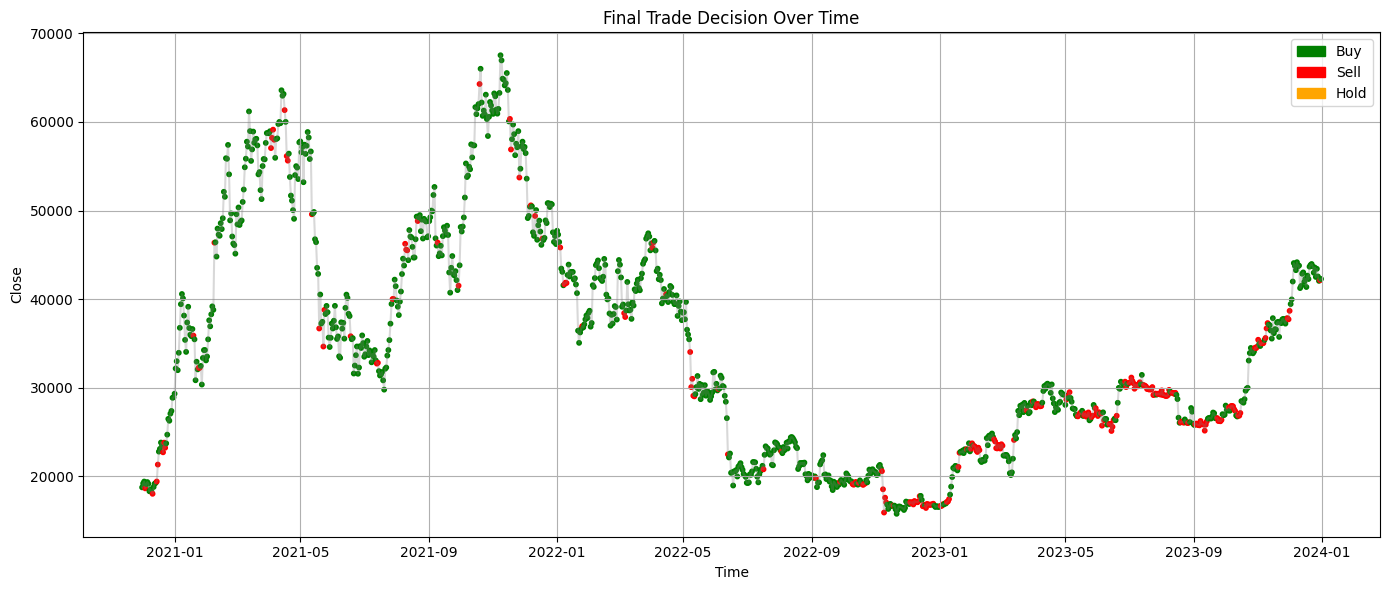

{'Start Trade Date': Timestamp('2020-12-01 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 341, 'Sharpe Ratio': np.float64(-0.865127), 'Max Drawdown (%)': np.float64(-2.457383), 'Trade per Interval': np.float64(0.302842), 'Trading Fees': 0.006}
Result for bullish=0.20, bearish=0.60: -0.865127
Running with bullish=0.20, bearish=0.80
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1127, 60, 5), y=(1127, 1)
🕒 Predicting for 1127 hours ≈ 47.0 days
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-11-30      19695.87     18352.033980
61   2020-12-01      18764.96     18362.014587
62   2020-12-02      19204.09     18504.146114
63   2020-12-03      19421.90     18587.300861
64   2020-12-04      18650.52     18693.198555
...         ...           ...              .

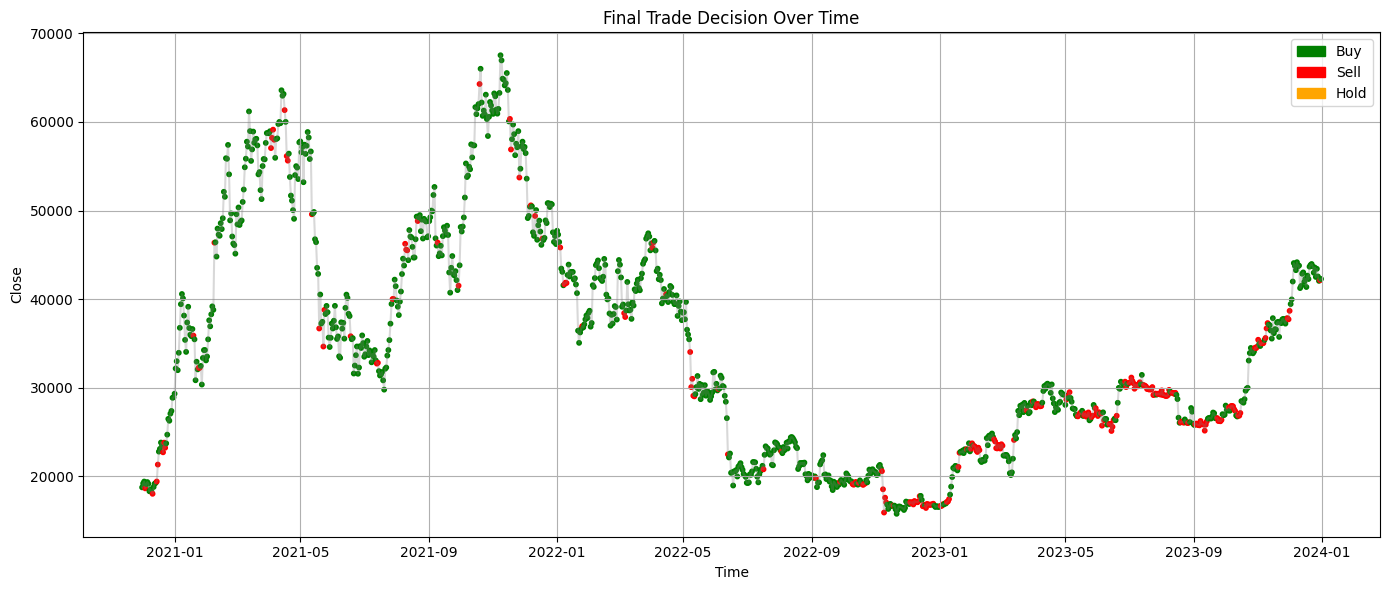

{'Start Trade Date': Timestamp('2020-12-01 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 341, 'Sharpe Ratio': np.float64(-0.865127), 'Max Drawdown (%)': np.float64(-2.457383), 'Trade per Interval': np.float64(0.302842), 'Trading Fees': 0.006}
Result for bullish=0.20, bearish=0.80: -0.865127
Running with bullish=0.40, bearish=0.20
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1127, 60, 5), y=(1127, 1)
🕒 Predicting for 1127 hours ≈ 47.0 days
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-11-30      19695.87     18352.033980
61   2020-12-01      18764.96     18362.014587
62   2020-12-02      19204.09     18504.146114
63   2020-12-03      19421.90     18587.300861
64   2020-12-04      18650.52     18693.198555
...         ...           ...              .

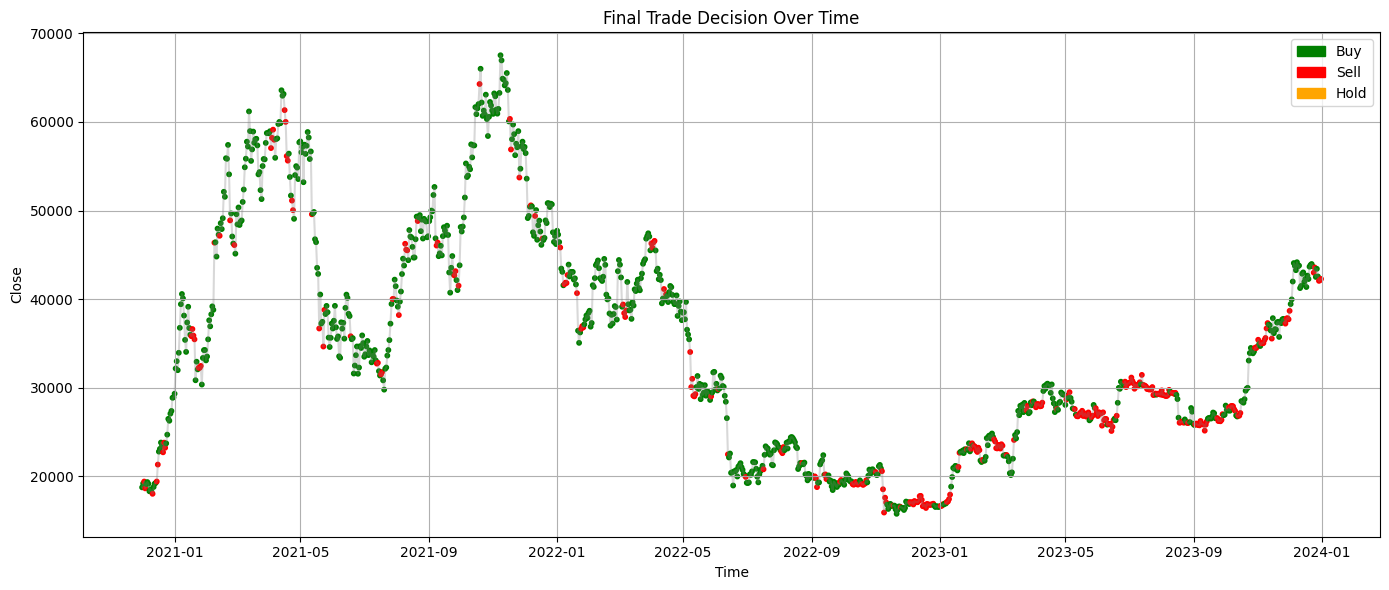

{'Start Trade Date': Timestamp('2020-12-01 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 391, 'Sharpe Ratio': np.float64(-0.5579), 'Max Drawdown (%)': np.float64(-2.278085), 'Trade per Interval': np.float64(0.347247), 'Trading Fees': 0.006}
Result for bullish=0.40, bearish=0.20: -0.5579
Running with bullish=0.40, bearish=0.40
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1127, 60, 5), y=(1127, 1)
🕒 Predicting for 1127 hours ≈ 47.0 days
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-11-30      19695.87     18352.033980
61   2020-12-01      18764.96     18362.014587
62   2020-12-02      19204.09     18504.146114
63   2020-12-03      19421.90     18587.300861
64   2020-12-04      18650.52     18693.198555
...         ...           ...              ...
1

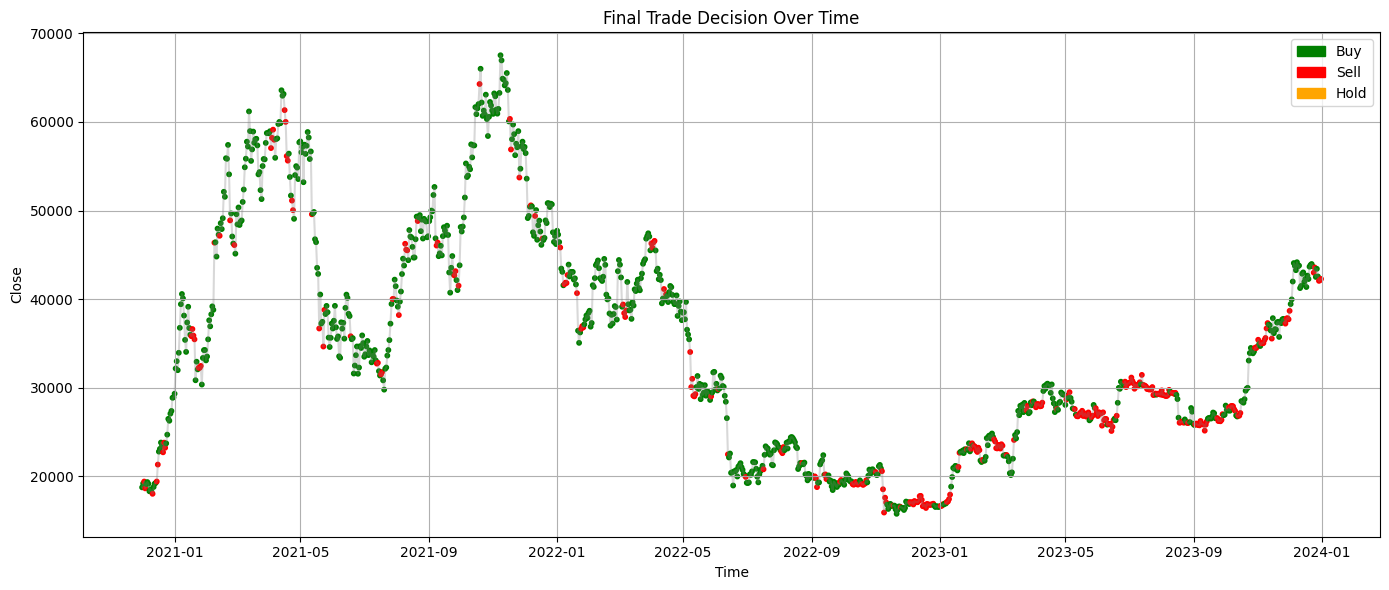

{'Start Trade Date': Timestamp('2020-12-01 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 391, 'Sharpe Ratio': np.float64(-0.5579), 'Max Drawdown (%)': np.float64(-2.278085), 'Trade per Interval': np.float64(0.347247), 'Trading Fees': 0.006}
Result for bullish=0.40, bearish=0.40: -0.5579
Running with bullish=0.40, bearish=0.60
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1127, 60, 5), y=(1127, 1)
🕒 Predicting for 1127 hours ≈ 47.0 days
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-11-30      19695.87     18352.033980
61   2020-12-01      18764.96     18362.014587
62   2020-12-02      19204.09     18504.146114
63   2020-12-03      19421.90     18587.300861
64   2020-12-04      18650.52     18693.198555
...         ...           ...              ...
1

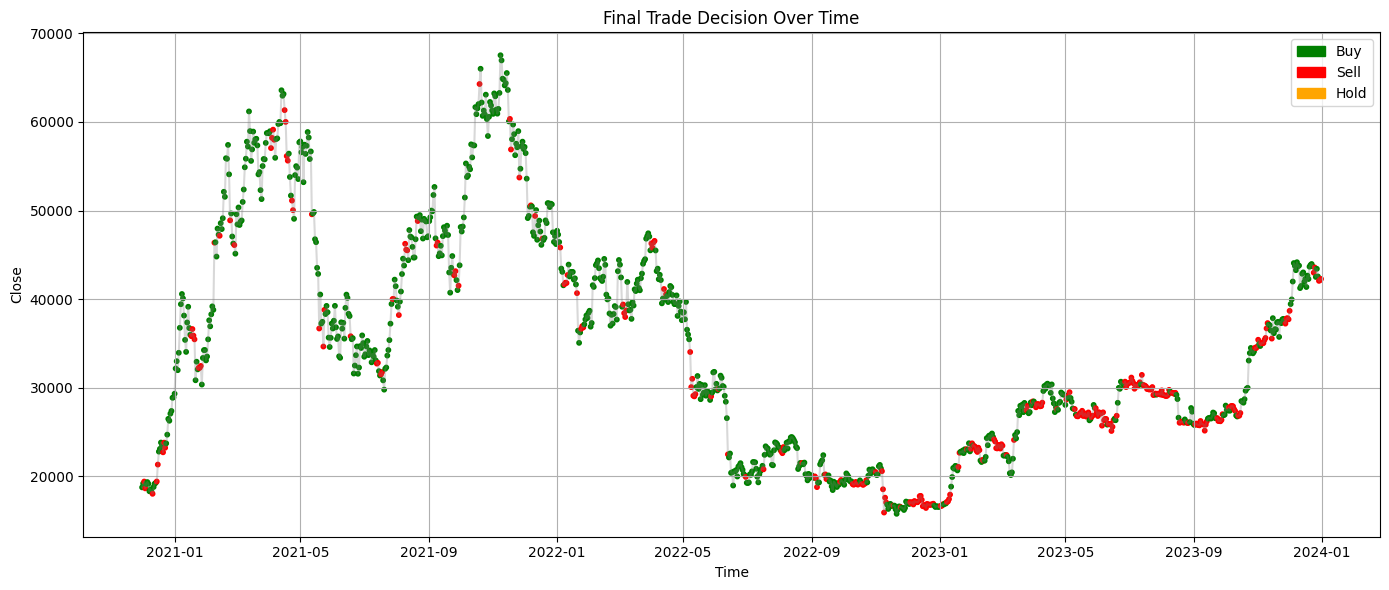

{'Start Trade Date': Timestamp('2020-12-01 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 391, 'Sharpe Ratio': np.float64(-0.5579), 'Max Drawdown (%)': np.float64(-2.278085), 'Trade per Interval': np.float64(0.347247), 'Trading Fees': 0.006}
Result for bullish=0.40, bearish=0.60: -0.5579
Running with bullish=0.40, bearish=0.80
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1127, 60, 5), y=(1127, 1)
🕒 Predicting for 1127 hours ≈ 47.0 days
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-11-30      19695.87     18352.033980
61   2020-12-01      18764.96     18362.014587
62   2020-12-02      19204.09     18504.146114
63   2020-12-03      19421.90     18587.300861
64   2020-12-04      18650.52     18693.198555
...         ...           ...              ...
1

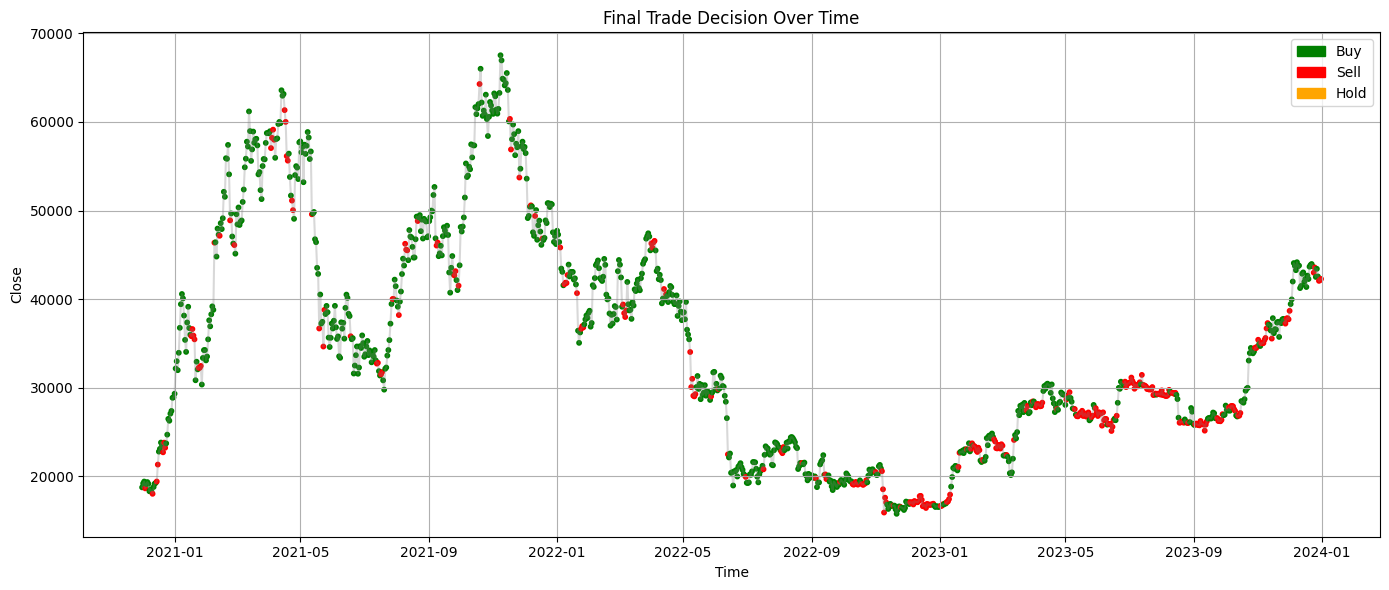

{'Start Trade Date': Timestamp('2020-12-01 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 391, 'Sharpe Ratio': np.float64(-0.58918), 'Max Drawdown (%)': np.float64(-2.262217), 'Trade per Interval': np.float64(0.347247), 'Trading Fees': 0.006}
Result for bullish=0.40, bearish=0.80: -0.58918
Running with bullish=0.60, bearish=0.20
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1127, 60, 5), y=(1127, 1)
🕒 Predicting for 1127 hours ≈ 47.0 days
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-11-30      19695.87     18352.033980
61   2020-12-01      18764.96     18362.014587
62   2020-12-02      19204.09     18504.146114
63   2020-12-03      19421.90     18587.300861
64   2020-12-04      18650.52     18693.198555
...         ...           ...              ...

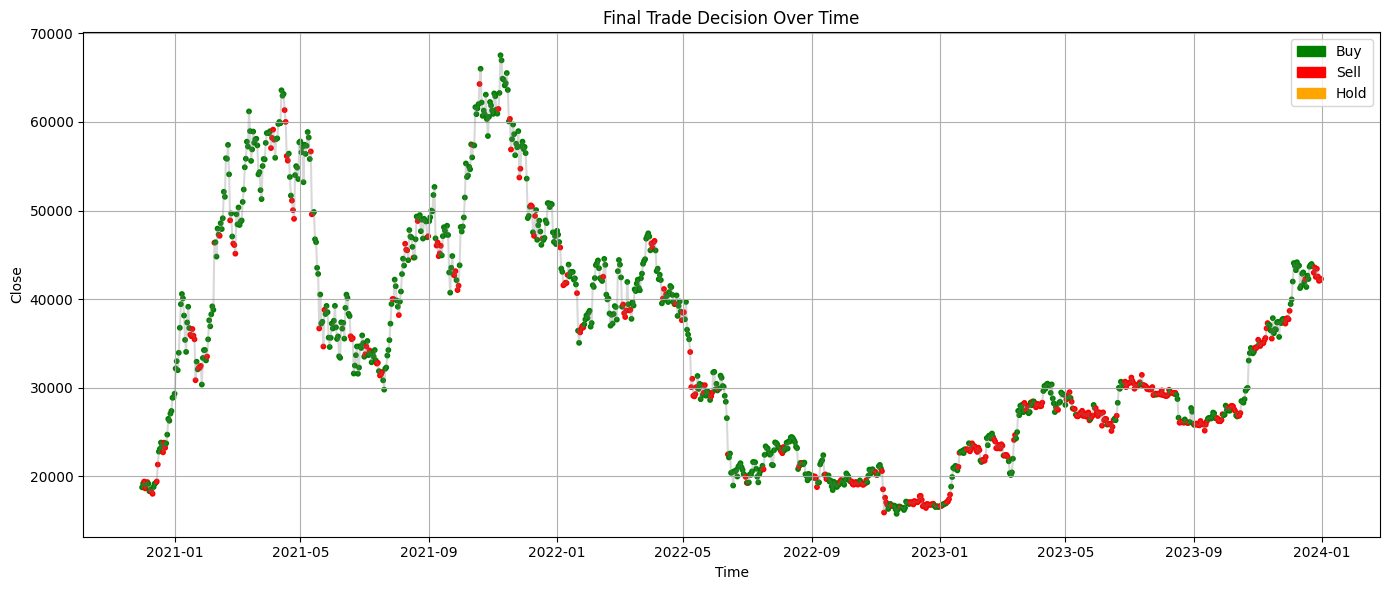

{'Start Trade Date': Timestamp('2020-12-01 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 463, 'Sharpe Ratio': np.float64(-1.230201), 'Max Drawdown (%)': np.float64(-3.224488), 'Trade per Interval': np.float64(0.41119), 'Trading Fees': 0.006}
Result for bullish=0.60, bearish=0.20: -1.230201
Running with bullish=0.60, bearish=0.40
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1127, 60, 5), y=(1127, 1)
🕒 Predicting for 1127 hours ≈ 47.0 days
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-11-30      19695.87     18352.033980
61   2020-12-01      18764.96     18362.014587
62   2020-12-02      19204.09     18504.146114
63   2020-12-03      19421.90     18587.300861
64   2020-12-04      18650.52     18693.198555
...         ...           ...              ..

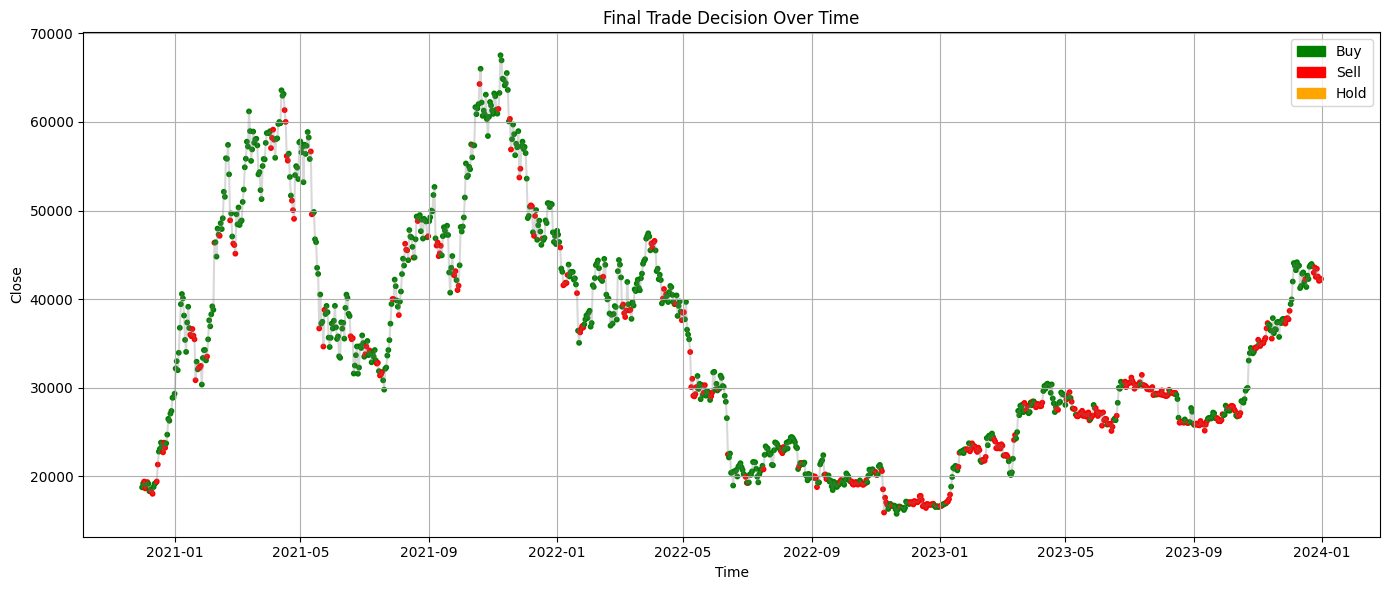

{'Start Trade Date': Timestamp('2020-12-01 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 463, 'Sharpe Ratio': np.float64(-1.230201), 'Max Drawdown (%)': np.float64(-3.224488), 'Trade per Interval': np.float64(0.41119), 'Trading Fees': 0.006}
Result for bullish=0.60, bearish=0.40: -1.230201
Running with bullish=0.60, bearish=0.60
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1127, 60, 5), y=(1127, 1)
🕒 Predicting for 1127 hours ≈ 47.0 days
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-11-30      19695.87     18352.033980
61   2020-12-01      18764.96     18362.014587
62   2020-12-02      19204.09     18504.146114
63   2020-12-03      19421.90     18587.300861
64   2020-12-04      18650.52     18693.198555
...         ...           ...              ..

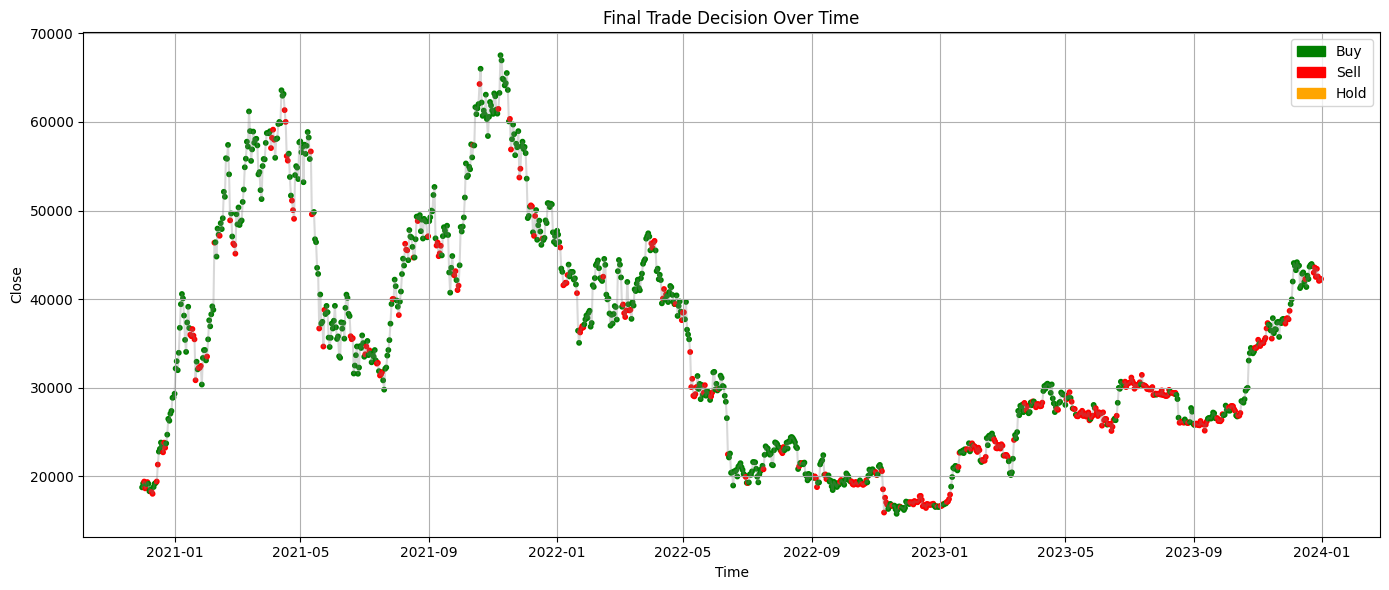

{'Start Trade Date': Timestamp('2020-12-01 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 463, 'Sharpe Ratio': np.float64(-1.232799), 'Max Drawdown (%)': np.float64(-3.229483), 'Trade per Interval': np.float64(0.41119), 'Trading Fees': 0.006}
Result for bullish=0.60, bearish=0.60: -1.232799
Running with bullish=0.60, bearish=0.80
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1127, 60, 5), y=(1127, 1)
🕒 Predicting for 1127 hours ≈ 47.0 days
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-11-30      19695.87     18352.033980
61   2020-12-01      18764.96     18362.014587
62   2020-12-02      19204.09     18504.146114
63   2020-12-03      19421.90     18587.300861
64   2020-12-04      18650.52     18693.198555
...         ...           ...              ..

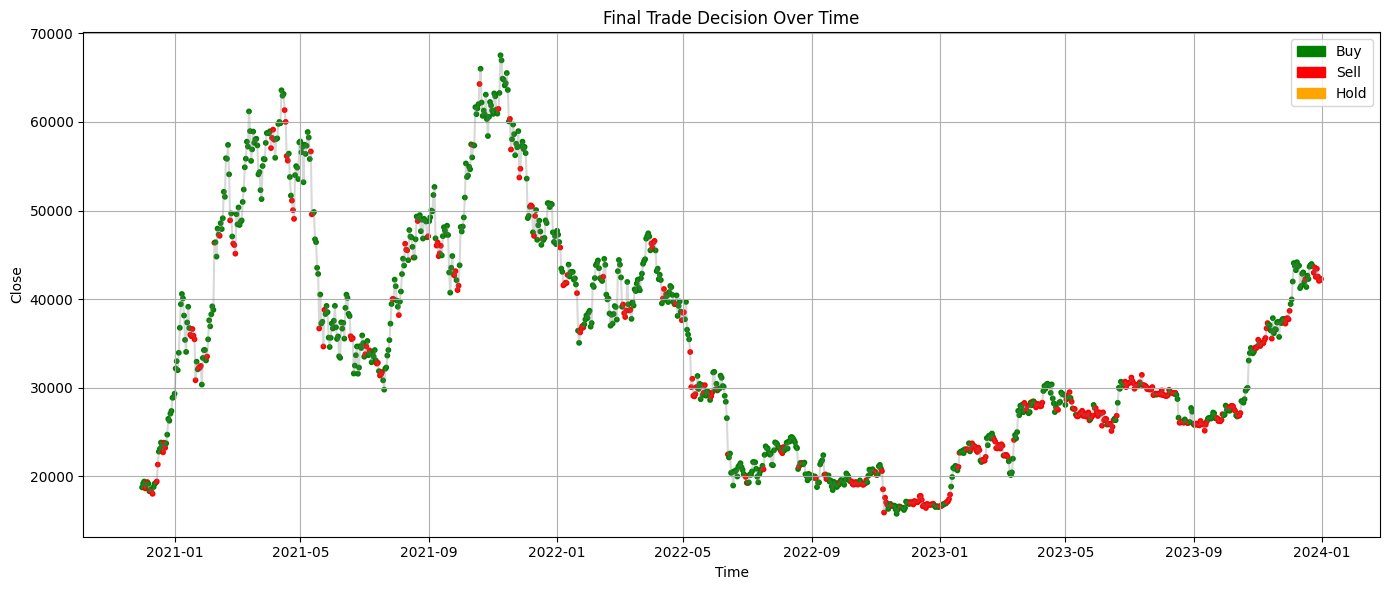

{'Start Trade Date': Timestamp('2020-12-01 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 463, 'Sharpe Ratio': np.float64(-1.26395), 'Max Drawdown (%)': np.float64(-3.213616), 'Trade per Interval': np.float64(0.41119), 'Trading Fees': 0.006}
Result for bullish=0.60, bearish=0.80: -1.26395
Running with bullish=0.80, bearish=0.20
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1127, 60, 5), y=(1127, 1)
🕒 Predicting for 1127 hours ≈ 47.0 days
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-11-30      19695.87     18352.033980
61   2020-12-01      18764.96     18362.014587
62   2020-12-02      19204.09     18504.146114
63   2020-12-03      19421.90     18587.300861
64   2020-12-04      18650.52     18693.198555
...         ...           ...              ...


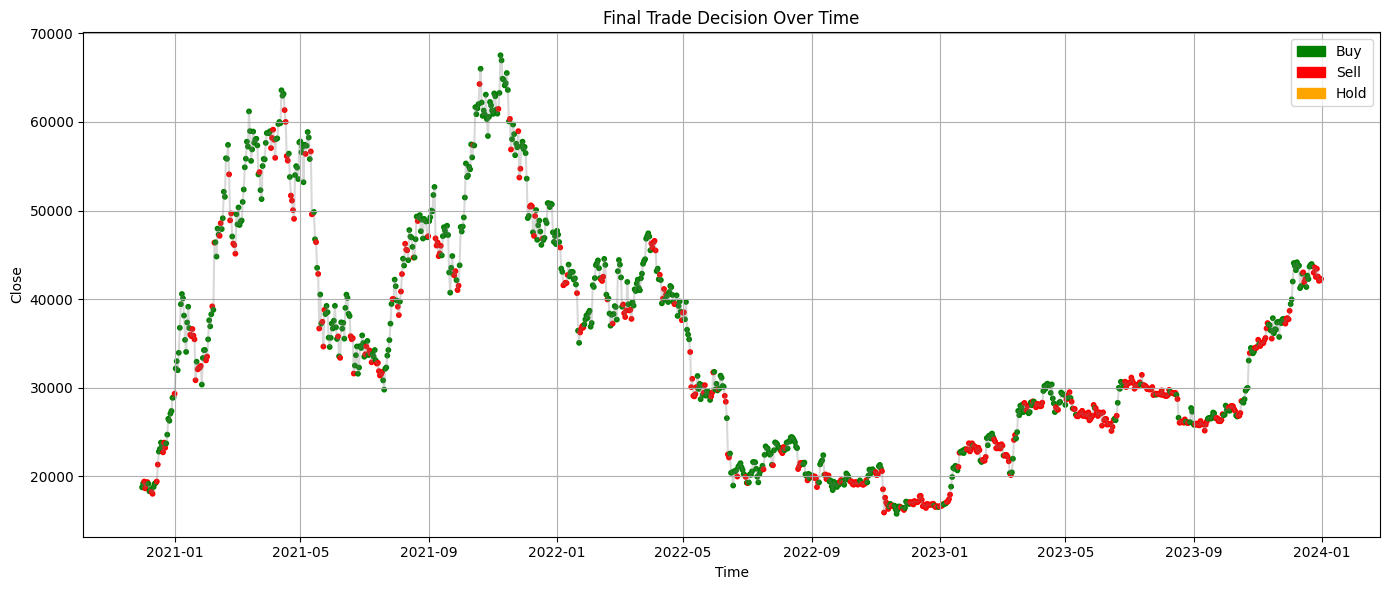

{'Start Trade Date': Timestamp('2020-12-01 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 523, 'Sharpe Ratio': np.float64(-1.155936), 'Max Drawdown (%)': np.float64(-3.126434), 'Trade per Interval': np.float64(0.464476), 'Trading Fees': 0.006}
Result for bullish=0.80, bearish=0.20: -1.155936
Running with bullish=0.80, bearish=0.40
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1127, 60, 5), y=(1127, 1)
🕒 Predicting for 1127 hours ≈ 47.0 days
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-11-30      19695.87     18352.033980
61   2020-12-01      18764.96     18362.014587
62   2020-12-02      19204.09     18504.146114
63   2020-12-03      19421.90     18587.300861
64   2020-12-04      18650.52     18693.198555
...         ...           ...              .

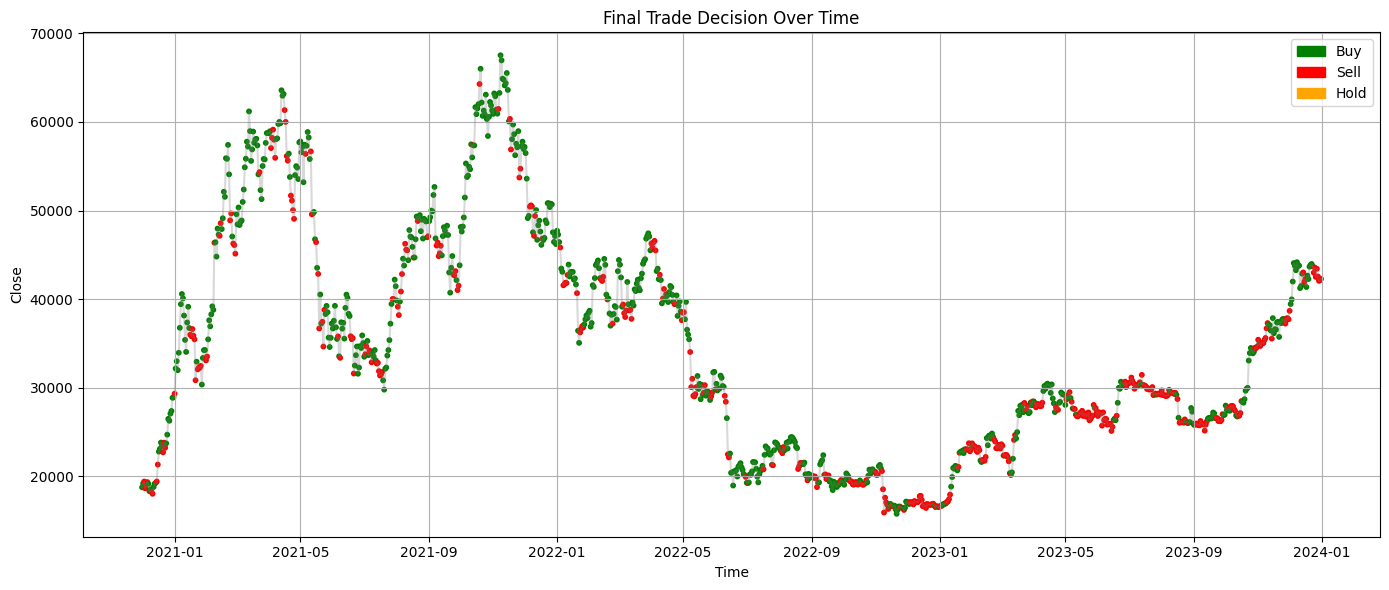

{'Start Trade Date': Timestamp('2020-12-01 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 507, 'Sharpe Ratio': np.float64(-1.25331), 'Max Drawdown (%)': np.float64(-3.137841), 'Trade per Interval': np.float64(0.450266), 'Trading Fees': 0.006}
Result for bullish=0.80, bearish=0.40: -1.25331
Running with bullish=0.80, bearish=0.60
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1127, 60, 5), y=(1127, 1)
🕒 Predicting for 1127 hours ≈ 47.0 days
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-11-30      19695.87     18352.033980
61   2020-12-01      18764.96     18362.014587
62   2020-12-02      19204.09     18504.146114
63   2020-12-03      19421.90     18587.300861
64   2020-12-04      18650.52     18693.198555
...         ...           ...              ...

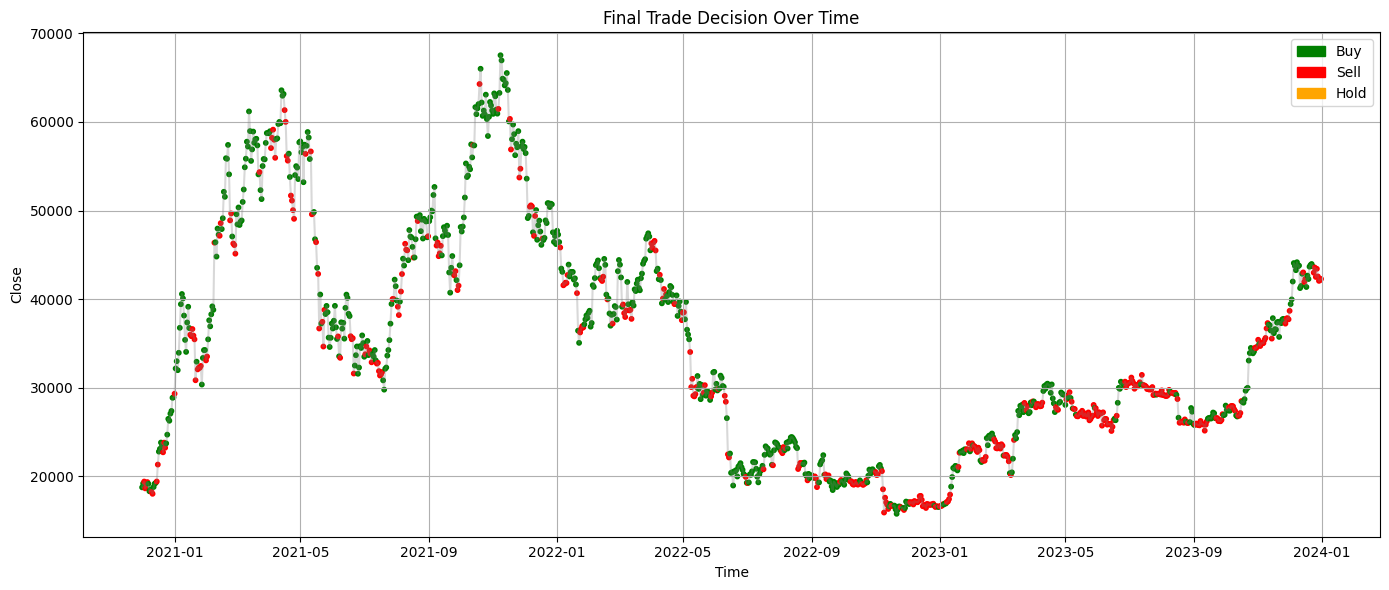

{'Start Trade Date': Timestamp('2020-12-01 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 511, 'Sharpe Ratio': np.float64(-1.267529), 'Max Drawdown (%)': np.float64(-3.166836), 'Trade per Interval': np.float64(0.453819), 'Trading Fees': 0.006}
Result for bullish=0.80, bearish=0.60: -1.267529
Running with bullish=0.80, bearish=0.80
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1127, 60, 5), y=(1127, 1)
🕒 Predicting for 1127 hours ≈ 47.0 days
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2020-11-30      19695.87     18352.033980
61   2020-12-01      18764.96     18362.014587
62   2020-12-02      19204.09     18504.146114
63   2020-12-03      19421.90     18587.300861
64   2020-12-04      18650.52     18693.198555
...         ...           ...              .

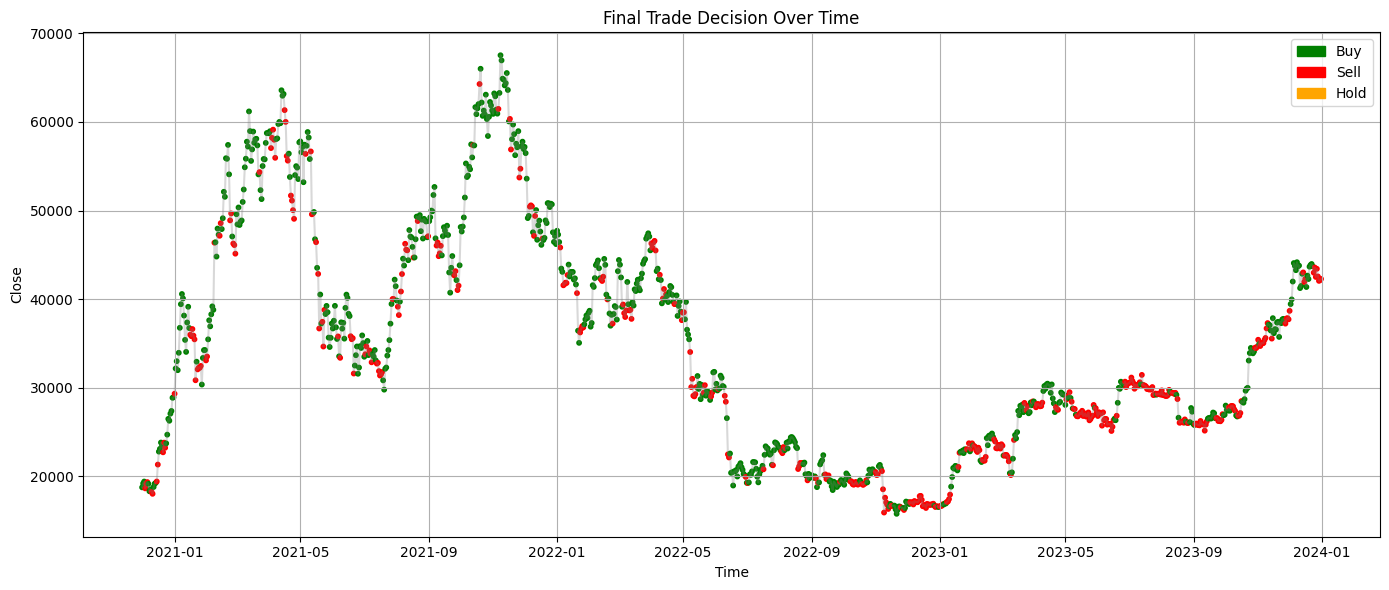

{'Start Trade Date': Timestamp('2020-12-01 00:00:00'), 'End Trade Date': Timestamp('2023-12-31 00:00:00'), 'Number of Trades': 515, 'Sharpe Ratio': np.float64(-1.310196), 'Max Drawdown (%)': np.float64(-3.174968), 'Trade per Interval': np.float64(0.457371), 'Trading Fees': 0.006}
Result for bullish=0.80, bearish=0.80: -1.310196
[[np.float64(-0.865127), np.float64(-0.865127), np.float64(-0.865127), np.float64(-0.865127)], [np.float64(-0.5579), np.float64(-0.5579), np.float64(-0.5579), np.float64(-0.58918)], [np.float64(-1.230201), np.float64(-1.230201), np.float64(-1.232799), np.float64(-1.26395)], [np.float64(-1.155936), np.float64(-1.25331), np.float64(-1.267529), np.float64(-1.310196)]]
heatmap_data:            0.2       0.4       0.6       0.8
0.2 -0.865127 -0.865127 -0.865127 -0.865127
0.4 -0.557900 -0.557900 -0.557900 -0.589180
0.6 -1.230201 -1.230201 -1.232799 -1.263950
0.8 -1.155936 -1.253310 -1.267529 -1.310196


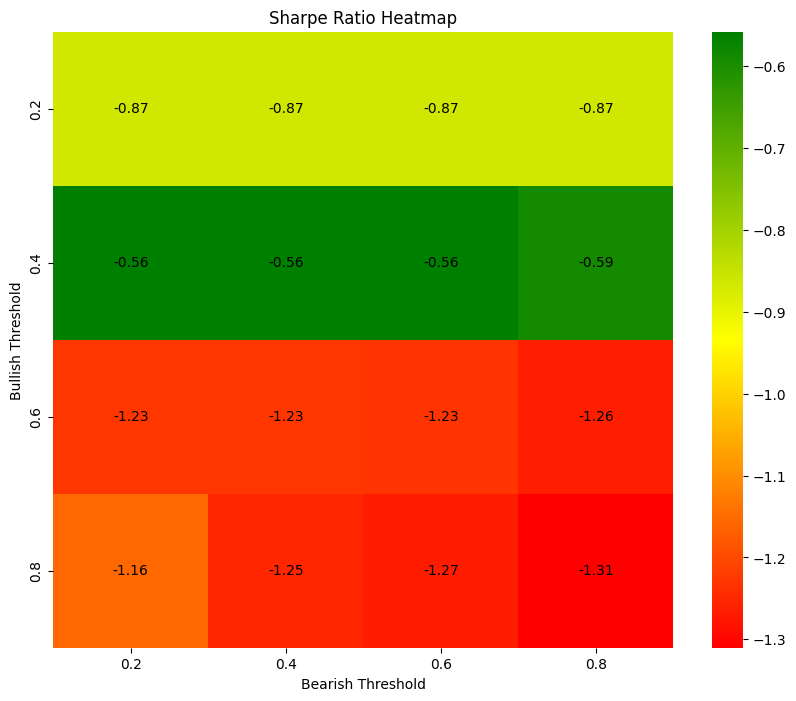

In [14]:
import numpy as np

bt.run_backtest_heatmap(bullish_range=np.linspace(0.2, 0.8, 4), bearish_range=np.linspace(0.2, 0.8, 4), metric='Sharpe Ratio' )


<Axes: >

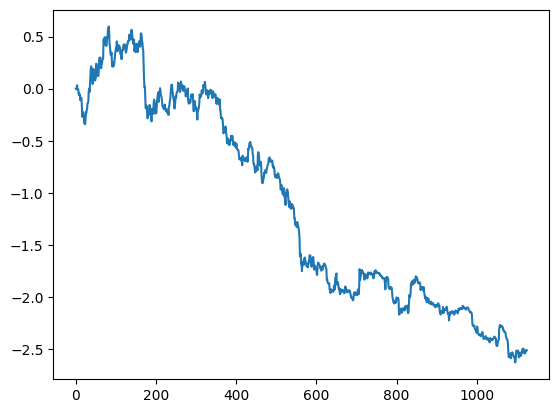

In [15]:
import pandas as pd

test_df = pd.read_csv("backtest_trade_logs.csv")
test_df["equity"].plot()



## Perform Forward Testing Using Best Threshold

### Set forward testing dataset

In [16]:
bt.set_predict_filepath(forwardtest_dataset_file_path, forwardtest_dataset_file_path)

### Set best threshold

In [17]:
bt.set_best_thresholds(bull_thres=0.4, bear_thres=0.4)

### Run testing using forward dataset

Predict data filepath in DeepPredictorStrategy: datasets/forwardtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/forwardtest_data.csv
✅ Testing set shape: X=(338, 60, 5), y=(338, 1)
🕒 Predicting for 338 hours ≈ 14.1 days
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Results from LSTM model:
     timestamp  actual_close  predicted_close
60  2024-03-01      62387.90     58309.611008
61  2024-03-02      61987.28     60266.326349
62  2024-03-03      63113.97     61324.083938
63  2024-03-04      68245.71     62016.330860
64  2024-03-05      63724.01     63485.506176
..         ...           ...              ...
393 2025-01-28     101335.52     93783.906610
394 2025-01-29     103733.24     93420.386290
395 2025-01-30     104722.94     93284.784529
396 2025-01-31     102429.56     93461.157845
397 2025-02-01     100635.65     93125.162739

[338 rows x 3 columns]


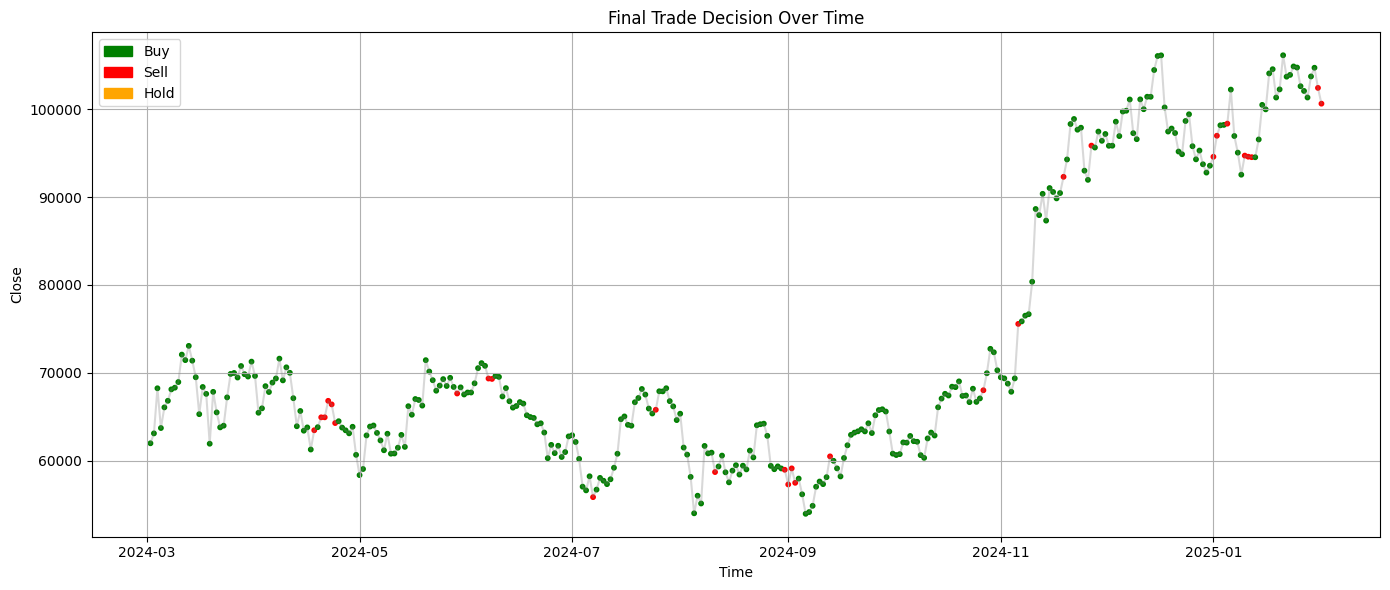

In [18]:
bt.run()

In [19]:
performance = bt.get_performance_results()

for key, value in performance.items():
    print(f"{key}: {value}")


Start Trade Date: 2024-03-02 00:00:00
End Trade Date: 2025-02-01 00:00:00
Number of Trades: 67
Sharpe Ratio: -0.255407
Max Drawdown (%): -0.533922
Trade per Interval: 0.198813
Trading Fees: 0.006


In [20]:
bt.get_trade_logs_csv()

Trade logs saved to backtest_trade_logs.csv
